# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

#new imports

from newsapi import NewsApiClient

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load env files
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY") # get news api key
news_api_key


'5d24353b06784dd394f9c4af3980574f'

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="Bitcoin, BTC",
    language="en"
)

# check bitcoin_news stats
btc_news['status'], btc_news['totalResults']

('ok', 2640)

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything( 
    q="ethereum, ETH",
    language="en"
)

# check ethereium_news stats
eth_news['status'], eth_news['totalResults']

('ok', 1576)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

# sentiment function
for article in btc_news["articles"]:
    text = article["content"].lower()
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
        
    btc_sentiment.append({"Compound": compound, "Positive": pos, "Neutral": neu, "Negative": neg, "Text": text})
        
btc_sentiment_df = pd.DataFrame(btc_sentiment)
btc_sentiment_df.head()

,Compound,Positive,Neutral,Negative,Text
0,-0.5267,0.000,0.879,0.121,nov 1 (reuters) - after months of tears and ta...
1,-0.3818,0.074,0.787,0.140,not even elon musk is safe from the volatility...
2,-0.3400,0.000,0.930,0.070,"oct 25 (reuters) - as a developed nation, you ..."
3,-0.2263,0.000,0.944,0.056,according to on-chain data from severalblock e...
4,-0.0418,0.079,0.835,0.086,the fine print: the following comments are own...


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

# sentiment calculation function
for article in eth_news["articles"]:
    text = article["content"].lower()
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
        
    ethereum_sentiments.append({"Compound": compound, "Positive": pos, "Neutral": neu, "Negative": neg, "Text": text})
        

eth_sentiment_df = pd.DataFrame(ethereum_sentiments)
eth_sentiment_df.head()

,Compound,Positive,Neutral,Negative,Text
0,-0.1531,0.000,0.948,0.052,oct 4 (reuters) - a new nft trading craze wher...
1,0.2144,0.049,0.951,0.000,ethereum(eth 4.87%) has been the biggest name ...
2,0.8481,0.272,0.728,0.000,etherscan is an important tool you should know...
3,0.4767,0.117,0.883,0.000,"as a proponent of dividend investing, i am a b..."
4,0.7351,0.187,0.813,0.000,a 81 minute read.\r\nimage generated by waifu ...


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.000000,100.000000
mean,0.165008,0.067350,0.904260,0.028410
std,0.378996,0.076647,0.087771,0.048041
min,-0.844200,0.000000,0.693000,0.000000
25%,0.000000,0.000000,0.840500,0.000000
50%,0.000000,0.055000,0.916000,0.000000
75%,0.458800,0.121000,1.000000,0.058250
max,0.864100,0.259000,1.000000,0.240000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.000000,100.000000
mean,0.245504,0.094770,0.870310,0.034960
std,0.415756,0.079931,0.099582,0.060653
min,-0.913600,0.000000,0.577000,0.000000
25%,0.000000,0.000000,0.794500,0.000000
50%,0.272400,0.087500,0.868500,0.000000
75%,0.636900,0.151750,0.951250,0.055500
max,0.883400,0.288000,1.000000,0.291000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH had a mean positive score of 0.088, while BTC had a score of .067. Therefore, ETH had the higher mean positive score. 

Q: Which coin had the highest compound score?

A: ETH had a max compound score of 0.88, while BTC had a score of .864. Therefore, ETH score was slightly higher than BTC. 

Q. Which coin had the highest positive score?

A: ETH had the highest positive score of .288, while BTC had a positive score of .259. Overall, ETH has a more positive sentiment than BTC. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw = sw.union(['chars'])

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in words if word.lower() not in sw]
    
    # Remove the stop words
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_sentiment_df["Tokens"] = btc_sentiment_df["Text"].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Positive,Neutral,Negative,Text,Tokens
0,-0.5267,0.000,0.879,0.121,nov 1 (reuters) - after months of tears and ta...,"[nov, reuters, months, tears, tantrums, bitcoi..."
1,-0.3818,0.074,0.787,0.140,not even elon musk is safe from the volatility...,"[even, elon, musk, safe, volatility, comes, in..."
2,-0.3400,0.000,0.930,0.070,"oct 25 (reuters) - as a developed nation, you ...","[oct, reuters, developed, nation, know, curren..."
3,-0.2263,0.000,0.944,0.056,according to on-chain data from severalblock e...,"[according, onchain, data, severalblock, explo..."
4,-0.0418,0.079,0.835,0.086,the fine print: the following comments are own...,"[fine, print, following, comments, owned, whoe..."


In [14]:
# Create a new tokens column for Ethereum
eth_sentiment_df["Tokens"] = eth_sentiment_df["Text"].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Positive,Neutral,Negative,Text,Tokens
0,-0.1531,0.000,0.948,0.052,oct 4 (reuters) - a new nft trading craze wher...,"[oct, reuters, new, nft, trading, craze, names..."
1,0.2144,0.049,0.951,0.000,ethereum(eth 4.87%) has been the biggest name ...,"[ethereumeth, biggest, name, nfts, smart, cont..."
2,0.8481,0.272,0.728,0.000,etherscan is an important tool you should know...,"[etherscan, important, tool, know, want, get, ..."
3,0.4767,0.117,0.883,0.000,"as a proponent of dividend investing, i am a b...","[proponent, dividend, investing, big, fan, ear..."
4,0.7351,0.187,0.813,0.000,a 81 minute read.\r\nimage generated by waifu ...,"[minute, readimage, generated, waifu, diffusio..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_token = btc_sentiment_df['Tokens'].sum()
btc_ngram= Counter(ngrams(btc_token, n=2))


In [17]:
# Generate the Ethereum N-grams where N=2
eth_token = eth_sentiment_df['Tokens'].sum()
eth_ngram= Counter(ngrams(eth_token, n=2))


In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10_tokens = token_count(btc_token, N=10)
btc_top10_tokens

[('bitcoin', 45),
 ('crypto', 28),
 ('btc', 27),
 ('markets', 22),
 ('cryptocurrency', 18),
 ('first', 17),
 ('moves', 16),
 ('market', 15),
 ('daily', 15),
 ('latest', 14)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_top10_tokens = token_count(eth_token, N=10)
eth_top10_tokens

[('ethereum', 35),
 ('crypto', 33),
 ('cryptocurrency', 18),
 ('eth', 18),
 ('ethereumeth', 15),
 ('market', 15),
 ('investors', 14),
 ('one', 14),
 ('ether', 14),
 ('cryptocurrencies', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

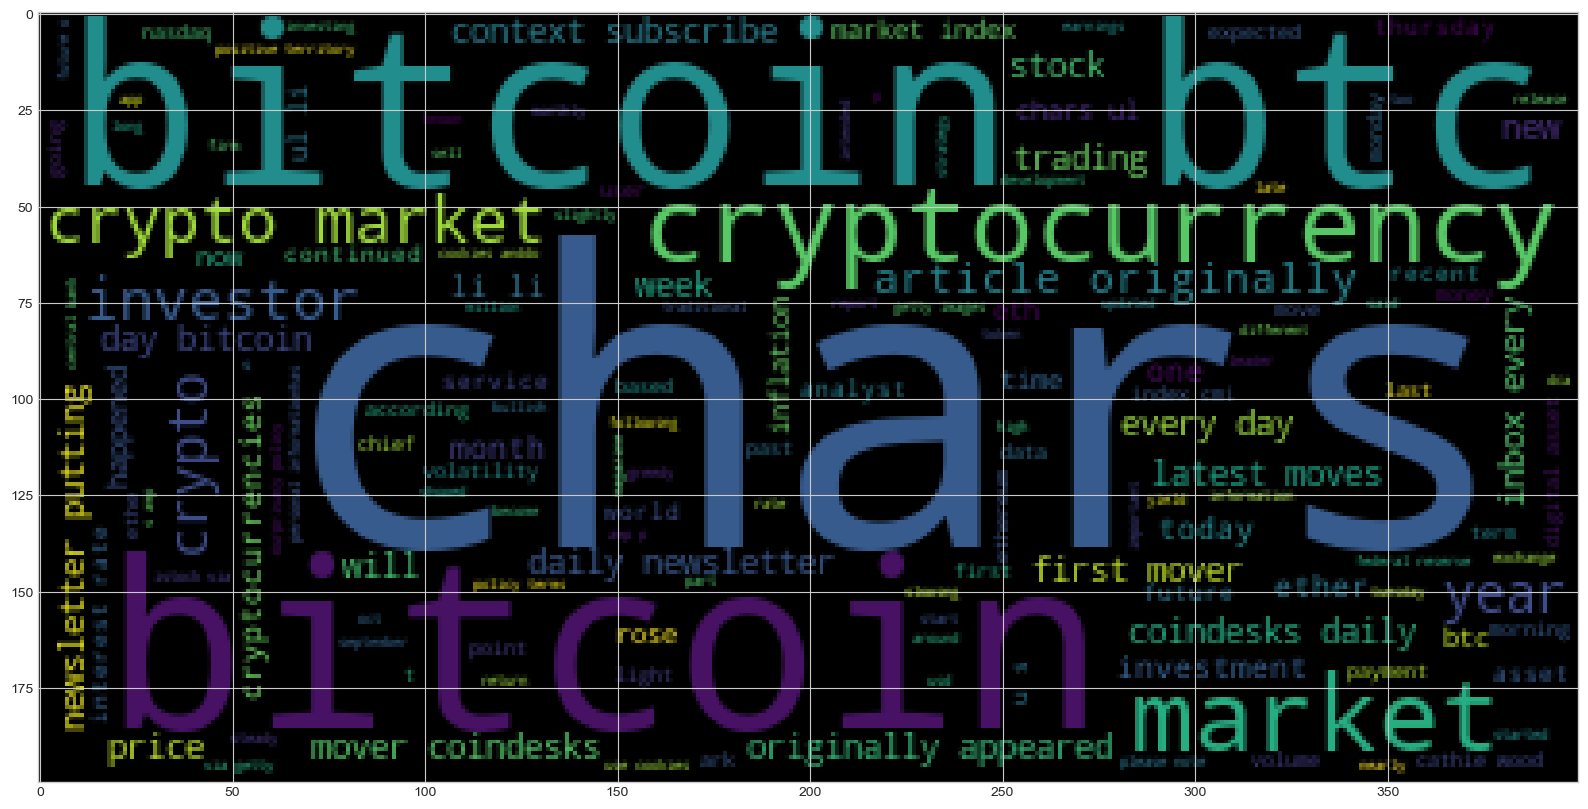

In [22]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_sentiment_df["Text"].sum())
plt.imshow(btc_wc)

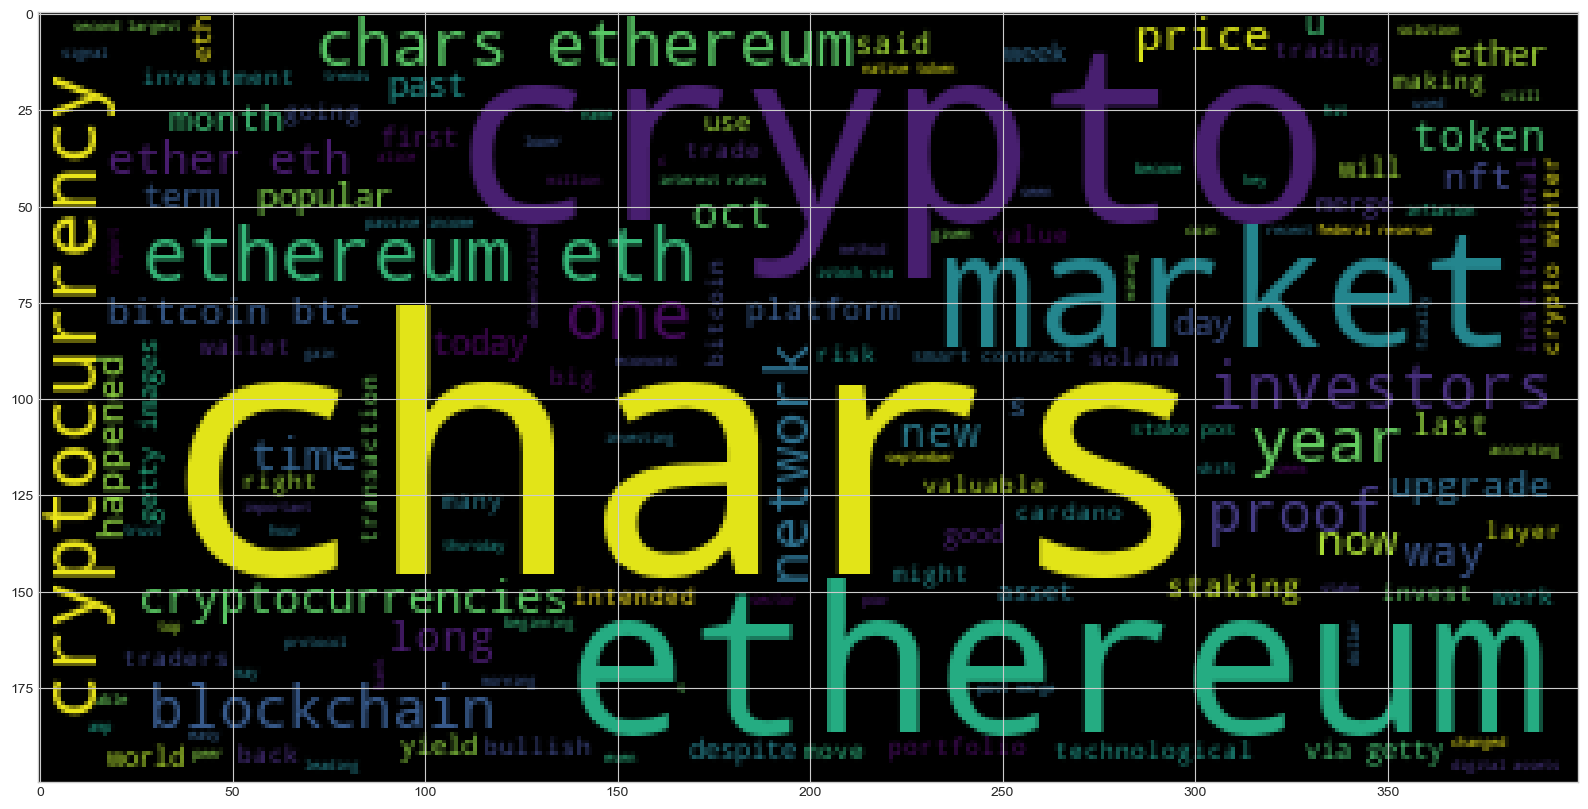

In [23]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_sentiment_df["Text"].sum())
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_sentiment_df["Text"])

In [28]:
# Run the NER processor on all of the text
doc_btc = nlp(btc_text)

# Add a title to the document
doc_btc.user_data['title'] = 'BTC Article'

In [29]:
# Render the visualization
displacy.render(doc_btc, style='ent')


In [30]:
# List all Entities
doc_btc.ents

(months,
 2022,
 $170 million,
 reuters,
 britain,
 liz,
 two,
 foundry usa,
 luxor,
 85 minutes,
 over 13,000,
 u.s.,
 wednesday,
 microsoft,
 the coming months,
 2,
 fiat,
 100%,
 close to $20,000,
 20,000,
 weeks,
 one,
 one,
 first,
 1920,
 a wild week,
 the week,
 the week,
 +288,
 2009,
 -2.46%,
 today,
 getty,
 38,000,
 $750 million,
 today,
 a rough year,
 -6.04%,
 today,
 6%,
 last year,
 the second consecutive day,
 just over $19,500,
 nearly 2%,
 the past 24 hours,
 last weeks,
 today,
 2022,
 3 p.m.,
 tuesday,
 +3094,
 0.17%,
 months,
 september,
 +3803,
 this morning,
 3.62%,
 the past few years,
 tens of thousands,
 -0.18%,
 april 24, 2020,
 one,
 roughly $7,509,
 158%,
 oct. 13,
 about 2 1/2 year,
 ark,
 148.7%,
 2020,
 monday,
 the week,
 2.7%,
 monday,
 around 8%,
 today,
 the past few decades,
 $7.5 billion,
 the new york cotton exchange,
 warren buffett,
 1964 to 2021,
 this year,
 -0.88%,
 tuesday,
 morning,
 this year,
 this morning,
 september,
 500,
 100,
 5%,
 t

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_sentiment_df["Text"])

In [32]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_text)

# Add a title to the document
doc_eth.user_data['title'] = 'ETH article'

In [33]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [34]:
# List all Entities
doc_eth.ents

(reuters,
 million-dollar,
 winter,
 4.87%,
 years,
 -0.55%,
 81 minute,
 second,
 eth 4.71%,
 today,
 -2.49%,
 second,
 25%,
 the past 30 days,
 500,
 almost 25%,
 2022,
 ethereum(eth 8.14%,
 nearly 50%,
 -1.00%,
 second,
 about $1,360,
 5,000,
 more than 375%,
 +4563,
 the past few months,
 the past few years,
 7.55%,
 apple,
 mass-mar,
 february,
 colorado,
 this morning,
 -1.83%,
 solana(sol -2.84%,
 solana,
 today,
 2022,
 3 p.m.,
 tuesday,
 +3094,
 -2.25%,
 one,
 one,
 one-month,
 oct. 19,
 shiba,
 more than 45,000,000%,
 last year,
 mid-september,
 eth 0.08%,
 one,
 1.99%,
 the last three years,
 650%,
 last month,
 cardano(ada -0.95%,
 the ethereum(eth -1.65%,
 this year,
 this morning,
 september,
 tuesday,
 morning,
 this year,
 getty images
 bloomberg's,
 us edition,
 last week,
 the third quarter,
 a month,
 the securities and exchange commission,
 ethereum(eth -2.49%,
 thursday,
 2,
 today,
 one,
 4.27%,
 2.87,
 december 2021,
 just around $0.93,
 october 28,
 year-long,
 

---